### Simple script to create the density column

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
country = pd.read_csv('dataset/datasets_23752_30346_countries of the world.csv')

In [52]:
country.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [53]:
country2 = country[['Country','Area (sq. mi.)']]

In [54]:
country2

,Country,Area (sq. mi.)
0,Afghanistan,647500
1,Albania,28748
2,Algeria,2381740
3,American Samoa,199
4,Andorra,468
...,...,...
222,West Bank,5860
223,Western Sahara,266000
224,Yemen,527970
225,Zambia,752614


In [55]:
pop = pd.read_csv('./part/pop_tot')

In [56]:
del pop['Unnamed: 0']

In [127]:
cc = pd.read_csv('dataset/CountryCode.csv', sep=';')

In [128]:
country2.head()

,Country,Area (sq. mi.)
0,Afghanistan,647500
1,Albania,28748
2,Algeria,2381740
3,American Samoa,199
4,Andorra,468


In [129]:
country2.Country = country2.Country.str.strip()

/home/andrea/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [130]:
cc.head()

,Name,CountryCode
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [131]:
tot = country2.merge(cc, left_on=country2.columns[0], right_on=cc.columns[0], how='left')

In [132]:
tot[tot.Name.isnull()] #da sistemare

,Country,Area (sq. mi.),Name,CountryCode
32,Burma,678500,NaN,NaN
45,"Congo, Dem. Rep.",2345410,NaN,NaN
74,Gaza Strip,360,NaN,NaN
147,Netherlands Antilles,960,NaN,NaN
167,Reunion,2517,NaN,NaN
222,West Bank,5860,NaN,NaN


In [133]:
tot2 = tot[['CountryCode','Area (sq. mi.)']]

In [134]:
tot2.head()

,CountryCode,Area (sq. mi.)
0,AFG,647500
1,ALB,28748
2,DZA,2381740
3,ASM,199
4,AND,468


In [135]:
pop

,SP.POP.TOTL,CountryCode,Year
0,9.249590e+07,ARB,1960
1,4.190810e+06,CSS,1960
2,9.140158e+07,CEB,1960
3,1.042475e+09,EAS,1960
4,8.964930e+08,EAP,1960
...,...,...,...
13479,1.041700e+05,VIR,2014
13480,4.294682e+06,WBG,2014
13481,2.618368e+07,YEM,2014
13482,1.572134e+07,ZMB,2014


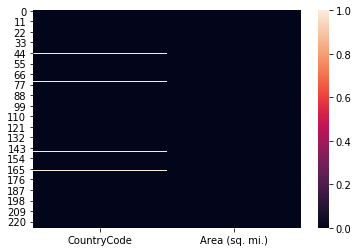

In [136]:
from seaborn import heatmap
heatmap(tot2.isnull())

In [187]:
tot3 = pop.merge(tot2, on='CountryCode', how='left')

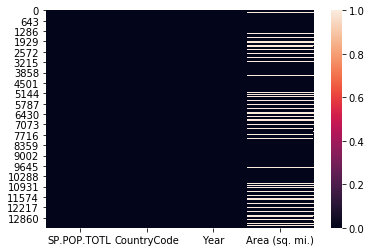

In [188]:
from seaborn import heatmap
heatmap(tot3.isnull())

In [189]:
tot3.head()

,SP.POP.TOTL,CountryCode,Year,Area (sq. mi.)
0,9.249590e+07,ARB,1960,NaN
1,4.190810e+06,CSS,1960,NaN
2,9.140158e+07,CEB,1960,NaN
3,1.042475e+09,EAS,1960,NaN
4,8.964930e+08,EAP,1960,NaN


In [194]:
temp = tot3[ tot3['Area (sq. mi.)'].isnull()] #da sistemare questi countrycode
temp[temp.Year == 1980]

,SP.POP.TOTL,CountryCode,Year,Area (sq. mi.)
4880,1.645710e+08,ARB,1980,NaN
4881,5.471020e+06,CSS,1980,NaN
4882,1.065649e+08,CEB,1980,NaN
4883,1.558465e+09,EAS,1980,NaN
4884,1.359784e+09,EAP,1980,NaN
4885,3.023114e+08,EMU,1980,NaN
4886,7.937694e+08,ECS,1980,NaN
4887,2.108097e+08,ECA,1980,NaN
4888,4.643408e+08,EUU,1980,NaN
4889,2.021989e+08,FCS,1980,NaN


In [173]:
tot3 = tot3.fillna(-1)

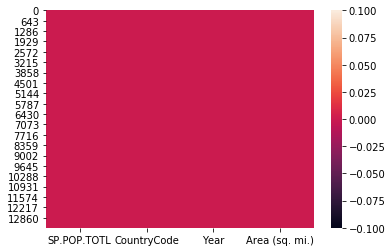

In [174]:
from seaborn import heatmap
heatmap(tot3.isnull())

In [175]:
tot3

,SP.POP.TOTL,CountryCode,Year,Area (sq. mi.)
0,9.249590e+07,ARB,1960,-1.0
1,4.190810e+06,CSS,1960,-1.0
2,9.140158e+07,CEB,1960,-1.0
3,1.042475e+09,EAS,1960,-1.0
4,8.964930e+08,EAP,1960,-1.0
...,...,...,...,...
13479,1.041700e+05,VIR,2014,1910.0
13480,4.294682e+06,WBG,2014,-1.0
13481,2.618368e+07,YEM,2014,527970.0
13482,1.572134e+07,ZMB,2014,752614.0


In [176]:
tot3['Density'] = tot3['SP.POP.TOTL'] / tot3['Area (sq. mi.)']

In [177]:
tot3.head()

,SP.POP.TOTL,CountryCode,Year,Area (sq. mi.),Density
0,9.249590e+07,ARB,1960,-1.0,-9.249590e+07
1,4.190810e+06,CSS,1960,-1.0,-4.190810e+06
2,9.140158e+07,CEB,1960,-1.0,-9.140158e+07
3,1.042475e+09,EAS,1960,-1.0,-1.042475e+09
4,8.964930e+08,EAP,1960,-1.0,-8.964930e+08


In [178]:
tot4 = tot3[['CountryCode','Density']]

In [179]:
tot4

,CountryCode,Density
0,ARB,-9.249590e+07
1,CSS,-4.190810e+06
2,CEB,-9.140158e+07
3,EAS,-1.042475e+09
4,EAP,-8.964930e+08
...,...,...
13479,VIR,5.453927e+01
13480,WBG,-4.294682e+06
13481,YEM,4.959311e+01
13482,ZMB,2.088899e+01


In [180]:
tot4.to_csv('part/density', index=False)

### Il dataset creato ha dei problemi. Alcuni nomi di paesi non coincidono nel primo merge, e allo stesso modo alcuni countrycode non coincidono nel secondo merge. Bisognerebbe dare una controllata a quelli. Per ora i valori con problemi, nel dataset finale, appaiono con Densità negativa.